# ❤️ Heart Disease Prediction
This project builds a machine learning model to predict the presence of heart disease based on clinical features such as blood pressure, age, cholesterol, etc.

## 📦 Importing Libraries
We use pandas, numpy, matplotlib, seaborn for analysis and visualization, and scikit-learn for machine learning models.

In [2]:
# importing necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 📂 Load Dataset
Load the Heart Disease dataset and check its shape, info, and preview.

In [3]:
#load data 
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 🔍 Exploratory Data Analysis (EDA)
Check for missing values, data types, and descriptive statistics.

In [4]:
#check for all null values
heart_disease.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

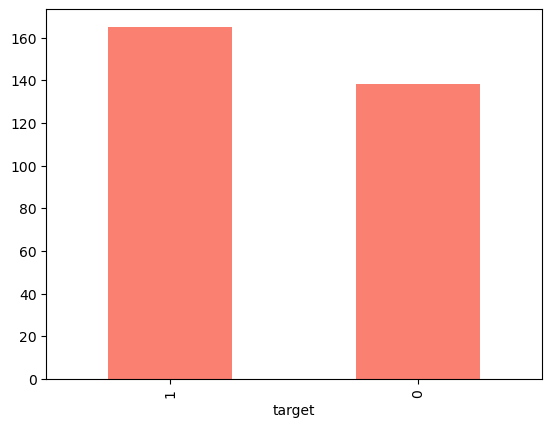

In [53]:
#plotting bar chart to compare the distribution of disease and no disease patient
heart_disease['target'].value_counts().plot(kind="bar",color="salmon");


In [6]:
#checking if there is any error in data types
heart_disease.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:

heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# value counts for sex column
heart_disease["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:

pd.crosstab(heart_disease["target"],heart_disease["sex"])



sex,0,1
target,,
0,24,114
1,72,93


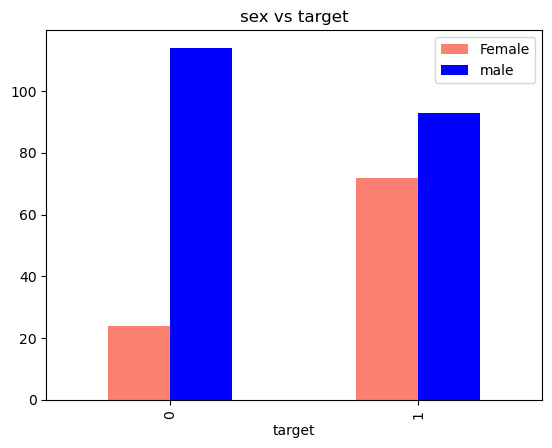

In [10]:
#plotting bar chart to compare or check realtion between sex and disease
pd.crosstab(heart_disease["target"],heart_disease["sex"]).plot(kind="bar",color=["salmon","blue"])
plt.title("sex vs target")
plt.legend(["Female","male"]);

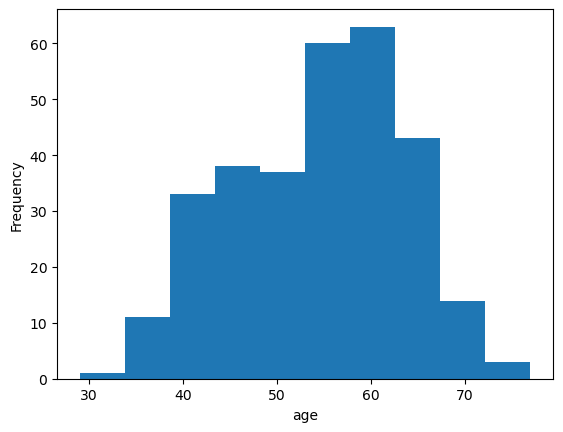

In [11]:
# Distribution of age column
heart_disease["age"].plot(kind="hist");
3plt.xlabel("age");

Text(0, 0.5, 'Heart rate')

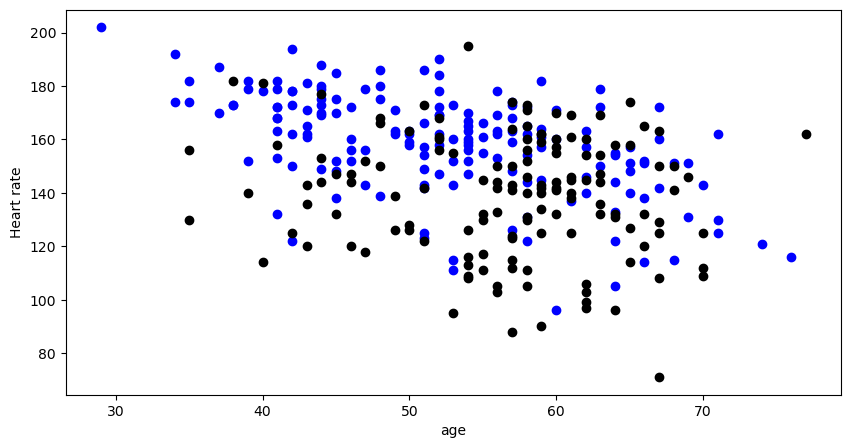

In [12]:
#plotting scatterplot to see relation between the age and disease column
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(heart_disease["age"][heart_disease["target"]==1],heart_disease["thalach"][heart_disease["target"]==1],color=["blue"])
plt.scatter(heart_disease["age"][heart_disease["target"]==0],heart_disease["thalach"][heart_disease["target"]==0],color=["black"])
plt.xlabel("age")
plt.ylabel("Heart rate")

Text(0.5, 1.0, 'chest pain ')

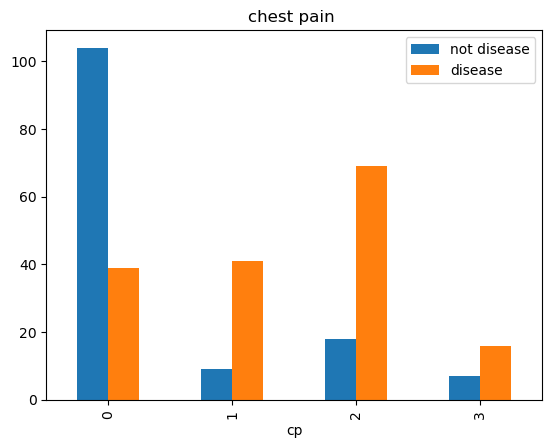

In [13]:
# plotting bar chart
pd.crosstab(heart_disease["cp"],heart_disease["target"]).plot(kind="bar")
plt.legend(["not disease","disease"])
plt.title("chest pain ")



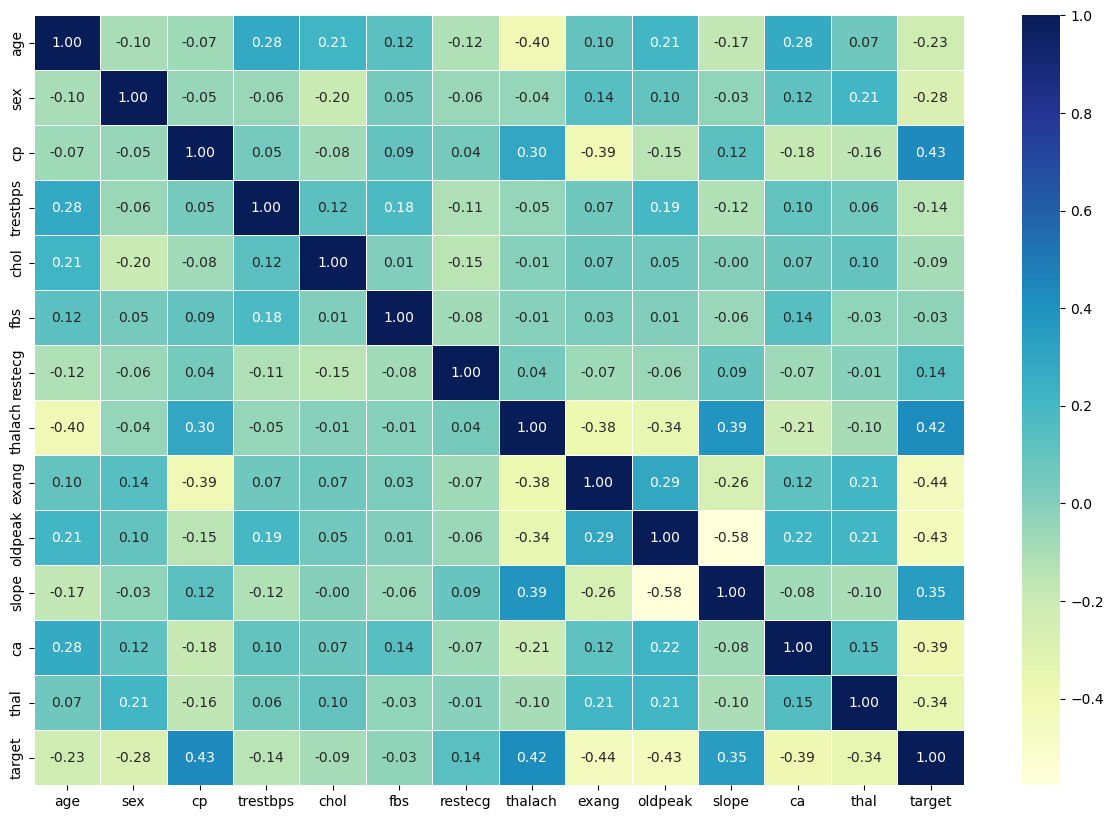

In [14]:
# making a correlation matrix
corr_matrix=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")


# Modelling


In [15]:

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## ✂️ Train-Test Split
Split dataset into training (80%) and testing (20%).

In [16]:
# splitting data into x and y 
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [17]:
# split data into train and test sets
np.random.seed(42)

#import module 
from sklearn.model_selection import train_test_split

#split into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Training Different model and Comparing these models 

In [18]:
# Code cell
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# putting model in dictionary for using it in function
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

# creating a function for different algorithm 

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [19]:
# Code cell
model_scores=fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\nouma\anaconda3\envs\ml_env1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ⚖️ Model Comparison
We compare model performance in terms of accuracy and AUC score.

In [20]:

model_compare=pd.DataFrame(model_scores,index=["accuracy"])

<Axes: >

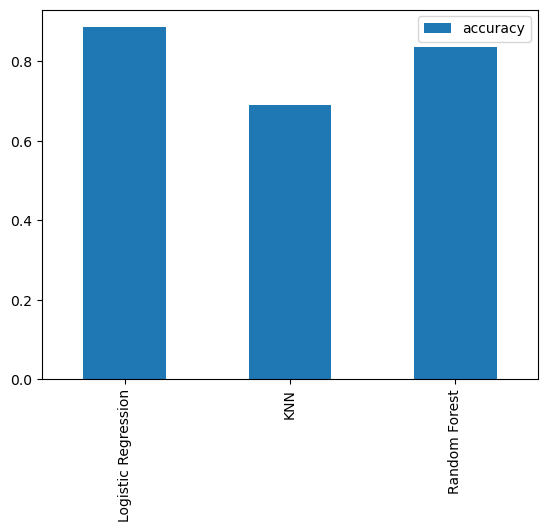

In [21]:

model_compare.T.plot(kind="bar")

# Hyperparameter Tunning

In [22]:
# KNN ESTIMATOR Tunning

train_scores=[]
test_scores=[]

# create a list 0f paramters for tunning 
neighbors=range(1,20)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    

In [23]:

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818]

In [24]:

max(test_scores),max(train_scores)

(0.7540983606557377, 1.0)

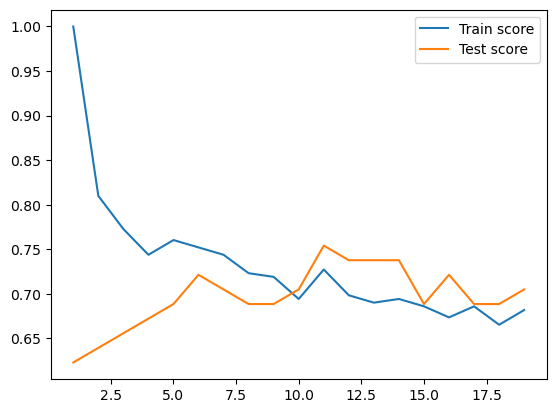

In [25]:
# plotting the training score nad test score 
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")


plt.legend();

In [26]:
# create a frid for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

# for Random Forest
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [27]:
# tuning Logistic model
np.random.seed(24)
from sklearn.model_selection import RandomizedSearchCV

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(x_train,y_train)
rs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [28]:
# tunning Random forest model
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              verbose=True)
rs_rf.fit(x_train,y_train)
rs_rf.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [55]:
# still better score in logistic Regression default paramter so focus on that model
#use Gidsearch cv


from sklearn.model_selection import GridSearchCV
log_reg_grid=  {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver for optimization
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criteria
    'intercept_scaling': [1, 2, 3]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,
                       verbose=1)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'intercept_scaling': [1, 2, 3],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [30]:
gs_log_reg.score(x_test,y_test)


0.8852459016393442

# Evaluating our Model

In [31]:
# EVALUATING THE LOGISTIC MODEL(TUNNEDD)
y_preds=gs_log_reg.predict(x_test)

In [32]:

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [33]:

y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [34]:

from sklearn.metrics import RocCurveDisplay


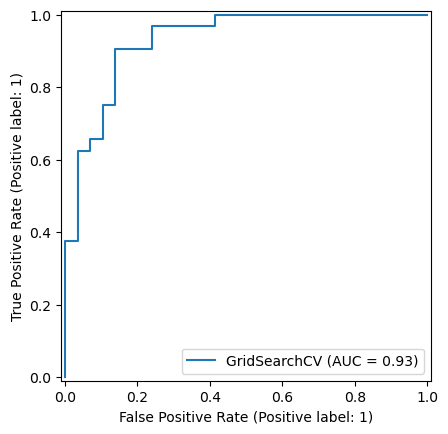

In [35]:
#plotting auc -roc curve 
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred=gs_log_reg.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 3, 29]], dtype=int64)

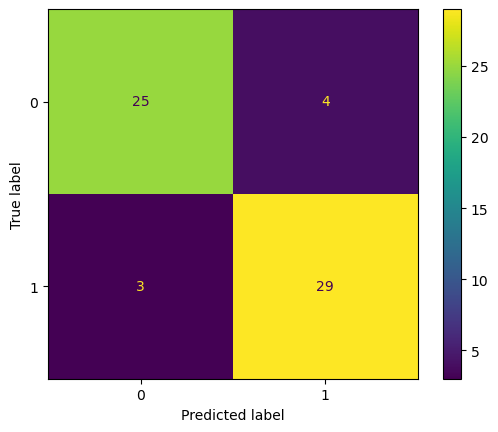

In [37]:

ConfusionMatrixDisplay.from_estimator(gs_log_reg,x_test,y_test);

In [38]:
# Classification Report 
from sklearn.metrics import classification_report

In [39]:
# printing the report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [40]:
# Returns the best paramters for the trained model
gs_log_reg.best_params_


{'C': 1,
 'intercept_scaling': 1,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.01}

In [41]:

clf= LogisticRegression(C= 1,
                        intercept_scaling=1,
                        penalty="l2",
                        solver="liblinear",
                        tol= 0.01)

In [42]:

from sklearn.model_selection import cross_val_score
# cross_validated accuracy
cv_accuracy=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_accuracy=cv_accuracy.mean()


In [43]:
# cross_validated precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=cv_precision.mean()

In [44]:
# cross_validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=cv_recall.mean()

In [45]:
# cross_validated f1-score
cv_f1_score=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1_score=cv_f1_score.mean()

In [46]:
# VISUALIZE THE CROSS_VALIDATE

cv_metrics_val=pd.DataFrame({"Accuracy":cv_accuracy,"Precision":cv_precision,
                        "Recall":cv_recall,"f1":cv_f1_score},index=[0])

<Axes: >

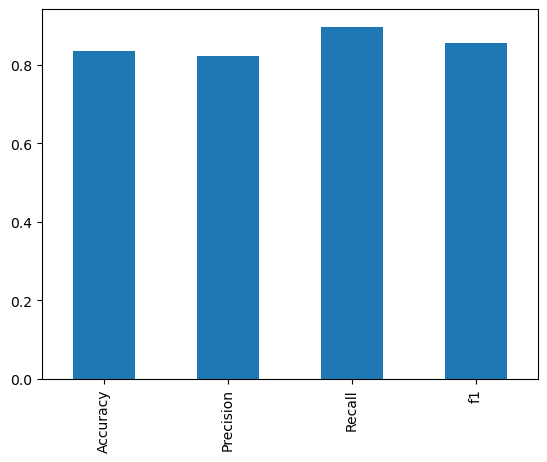

In [47]:

cv_metrics_val.T.plot(kind="bar",legend=False)

# Feature Engineering

In [48]:
# how much each feature is important or contibute to the target variable
gs_log_reg.best_params_

clf=LogisticRegression(C= 1,
                       intercept_scaling= 1,
                       penalty= 'l2',
                       solver= 'liblinear',
                       tol= 0.01)
clf.fit(x_train,y_train)


LogisticRegression(C=1, solver='liblinear', tol=0.01)

In [49]:
# Code cell
clf.coef_

array([[ 0.00736764, -1.15297868,  0.78207127, -0.01198376, -0.0017386 ,
         0.01772929,  0.50908592,  0.02624126, -0.79469215, -0.58192231,
         0.58145052, -0.71120977, -0.89474785]])

In [50]:
# Code cell
feature_dict=dict(zip(heart_disease.columns,clf.coef_[0]))
feature_dict

{'age': 0.007367638886905694,
 'sex': -1.1529786821827488,
 'cp': 0.7820712664888486,
 'trestbps': -0.01198375526455363,
 'chol': -0.0017385979985750275,
 'fbs': 0.017729291576438575,
 'restecg': 0.5090859190244101,
 'thalach': 0.026241264988458576,
 'exang': -0.794692154481028,
 'oldpeak': -0.5819223119062498,
 'slope': 0.5814505200757885,
 'ca': -0.7112097676140832,
 'thal': -0.894747851264549}

# Feature Importance/Selection
Considering which feature contributes the most and which is the least importance feature that impact the model performance

<Axes: >

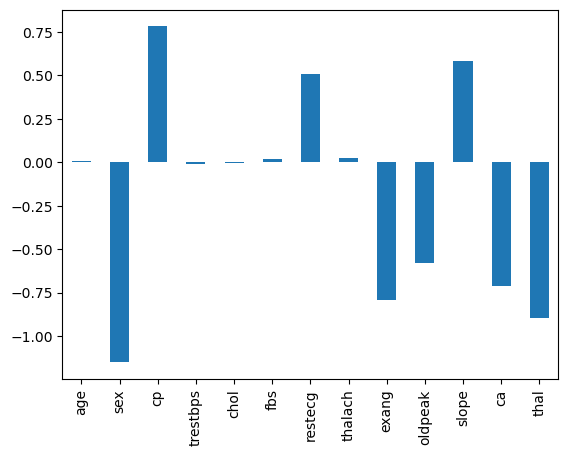

In [51]:

feature_dict=pd.DataFrame(feature_dict,index=[0])
feature_dict.T.plot(kind="bar",legend=False)

# saving the model

In [52]:
# Code cell
import pickle

# Save the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(gs_log_reg, file)
